# **II. Khám phá dữ liệu**

**Checklist:**
1. Tổng quan về tập dữ liệu
2. Phân tích Cột Số
3. Phân tích các cột phân loại
4. Phân tích các cột tọa độ
5. Phân tích cột thời gian
6. Phân tích dữ liệu thiếu
7. Mối quan hệ và Tương quan
8. Quan sát ban đầu và Insight
9. Xuất dữ liệu đã xử lý ra file `.csv`

## Import các thư viện cần thiết

In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))  # setup đường dẫn

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns 

## Load dữ liệu

In [2]:
input_path = "../data/raw/Global_Landslide_Catalog_Export.csv"
df = pd.read_csv(input_path)

## **1. Tổng quan về tập dữ liệu**

### 1.1. Thông tin cơ bản

In [3]:
print("Thông tin của 5 dòng đầu")
df.head()

Thông tin của 5 dòng đầu


,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,08/01/2008 12:00:00 AM,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,...,CN,Shaanxi,0.0,Jingyang,41.02145,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,107.4500,32.5625
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,01/02/2009 02:00:00 AM,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,...,US,Oregon,36619.0,Lake Oswego,0.60342,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.6630,45.4200
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,01/19/2007 12:00:00 AM,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,...,PE,Junín,14708.0,San Ramón,0.85548,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-75.3587,-11.1295
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,1067,07/31/2009 12:00:00 AM,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,...,NP,Mid Western,20908.0,Dailekh,0.75395,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.7080,28.8378
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,2603,10/16/2010 12:00:00 PM,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,...,PH,Central Visayas,798634.0,Cebu City,2.02204,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,123.8978,10.3336


In [4]:
print("Các đặc trưng của tập dữ liệu")
print(df.columns)

Các đặc trưng của tập dữ liệu
Index(['source_name', 'source_link', 'event_id', 'event_date', 'event_time',
       'event_title', 'event_description', 'location_description',
       'location_accuracy', 'landslide_category', 'landslide_trigger',
       'landslide_size', 'landslide_setting', 'fatality_count', 'injury_count',
       'storm_name', 'photo_link', 'notes', 'event_import_source',
       'event_import_id', 'country_name', 'country_code',
       'admin_division_name', 'admin_division_population',
       'gazeteer_closest_point', 'gazeteer_distance', 'submitted_date',
       'created_date', 'last_edited_date', 'longitude', 'latitude'],
      dtype='object')


#### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [5]:
print("Số dòng:", df.shape[0])
print("Số cột:", df.shape[1])

Số dòng: 11033
Số cột: 31


#### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?
Mỗi dòng ứng với một sự kiện sạt lở đất. Các dòng đều có ý nghĩa giống nhau.

#### Kích thước tổng thể của tập dữ liệu là bao nhiêu?

In [6]:
total_usage_mb = df.memory_usage(deep=True).sum() / (1024 * 1024)

print(f"Dung lượng bộ nhớ: {total_usage_mb:.2f} MB")

Dung lượng bộ nhớ: 21.31 MB


### 1.2. Tính Toàn vẹn Dữ liệu

#### Có các dòng bị trùng lặp không? Nếu có, số lượng là bao nhiêu?

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.duplicated('event_id').sum()

np.int64(0)

=> Không có dòng nào bị trùng lặp, trùng event_id

#### Có cần phải xóa các dòng bị trùng không?

=> Do không có dòng nào bị trùng lặp nên không cần phải xóa

#### Tất cả các dòng đã đầy đủ thông tin chưa, hay một số dòng hoàn toàn trống?

In [9]:
rows_completely_empty = df.isna().all(axis=1)
count_empty = rows_completely_empty.sum()
if count_empty > 0:
    print(f"=> Số hàng hoàn toàn trống là: {count_empty}")
else:
    print("=> Không có hàng nào hoàn toàn trống")

# Xem các dòng đó (nếu có)
if count_empty:
    df[rows_completely_empty]

=> Không có hàng nào hoàn toàn trống


### 1.3. Danh mục cột

#### Ý nghĩa/định nghĩa của từng cột là gì?

| Tên thuộc tính (Feature) | Ý nghĩa/định nghĩa |
| :--- | :--- |
| **source_name** | Tên của nguồn tin báo cáo về sự kiện sạt lở |
| **source_link** | Đường dẫn (Link) đến nguồn gốc của báo cáo |
| **event_id** | Mã định danh duy nhất cho sự kiện sạt lở |
| **event_date** | Ngày xảy ra sự kiện sạt lở |
| **event_time** | Giờ xảy ra sự kiện (lưu ý: trường này có thể thiếu nhiều giá trị) |
| **event_title** | Tiêu đề hoặc tên gọi của sự kiện sạt lở |
| **event_description** | Mô tả chi tiết về sự kiện sạt lở |
| **location_description** | Mô tả về địa điểm nơi xảy ra sạt lở |
| **location_accuracy** | Độ chính xác của dữ liệu vị trí địa lý |
| **landslide_category** | Phân loại sạt lở (ví dụ: landslide, mudslide...) |
| **landslide_size** | Kích thước/quy mô của vụ sạt lở |
| **landslide_trigger** | Nguyên nhân kích hoạt vụ sạt lở (ví dụ: monsoon, rain, downpour,...) |
| **landslide_setting** | Bối cảnh địa lý/môi trường xảy ra |
| **fatality_count** | Số lượng người tử vong do sạt lở |
| **injury_count** | Số lượng người bị thương do sạt lở |
| **storm_name** | Tên cơn bão (nếu vụ sạt lở do bão gây ra) |
| **photo_link** | Đường dẫn đến hình ảnh minh họa vụ sạt lở |
| **notes** | Các ghi chú hoặc nhận xét bổ sung về sự kiện |
| **event_import_source** | Nguồn gốc nơi dữ liệu sự kiện được nhập vào hệ thống |
| **event_import_id** | Mã ID của sự kiện từ nguồn nhập liệu |
| **country_name** | Tên quốc gia nơi xảy ra sạt lở |
| **country_code** | Mã quốc gia |
| **admin_division_name** | Tên đơn vị hành chính (ví dụ: tên Tỉnh hoặc Bang) nơi xảy ra sạt lở |
| **admin_division_population** | Dân số của đơn vị hành chính đó |
| **gazeteer_closest_point** | Tên địa danh hoặc điểm mốc địa lý gần nhất với vị trí sạt lở |
| **gazeteer_distance** | Khoảng cách từ vị trí sạt lở đến điểm mốc địa lý gần nhất |
| **submitted_date** | Ngày sự kiện được gửi vào danh mục dữ liệu |
| **created_date** | Ngày sự kiện được tạo trong danh mục dữ liệu |
| **last_edited_date** | Ngày dữ liệu về sự kiện được chỉnh sửa lần cuối |
| **longitude** | Kinh độ của vị trí sạt lở |
| **latitude** | Vĩ độ của vị trí sạt lở |

#### Có cột nào nên được loại bỏ không? Tại sao?

In [10]:
# Xác định số lượng giá trị thiếu và tỷ lệ của các feature
df_cols = pd.DataFrame({'Count Missing': df.isna().sum(),
                        'Percent Missing': df.isnull().sum()*100/df.shape[0]})

df_cols = df_cols[df_cols['Percent Missing'] > 80]

print("Các cột thiếu hơn 80% dữ liệu")
df_cols

Các cột thiếu hơn 80% dữ liệu


,Count Missing,Percent Missing
event_time,11033,100.000000
storm_name,10456,94.770235
photo_link,9537,86.440678
notes,10716,97.126801


Nhóm quyết định loại bỏ các cột sau khỏi bộ dữ liệu để tập trung vào việc phân tích các yếu tố ảnh hưởng đến sạt lở:
- Loại bỏ Metadata hệ thống: Các cột như `event_import_id, event_import_source, submitted_date, created_date, last_edited_date` được loại bỏ vì chúng chỉ phản ánh quy trình nhập liệu hành chính, không mang thông tin về đặc điểm vật lý của sự kiện sạt lở.
- Loại bỏ thông tin dư thừa: Cột `country_code` bị loại bỏ vì đã có `country_name`.
- Loại bỏ dữ liệu không cấu trúc: Các cột `source_link và photo_link` được loại bỏ vì chúng là các đường dẫn web, không phục vụ cho việc phân tích thống kê định lượng.
- Loại bỏ các cột mô tả văn bản: Các cột như `event_description, location_description` vì nhóm sẽ không đi sâu vào việc phân tích NLP.
- Các cột có dữ liệu thiếu quá nhiều (dựa vào phân tích phía trên): Các cột `event_time, storm_name, notes` đều có **Percent Missing** > 80%.

**Tiền xử lý**  
Thực hiện loại bỏ các cột không cần thiết

In [11]:
cols_to_drop = [
    'event_import_id', 'event_import_source', 
    'created_date', 'submitted_date', 'last_edited_date',
    'source_link', 'photo_link', 'storm_name',
    'country_code', 'event_time', 'notes',
    'event_description', 'location_description'
]

df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

print("Số dòng và cột của tập dữ liệu sau khi loại bỏ các cột không cần thiết là:", df.shape)

Số dòng và cột của tập dữ liệu sau khi loại bỏ các cột không cần thiết là: (11033, 18)


#### Những cột nào có liên quan đến việc phân tích tiềm năng?

Theo như ý nghĩa/định nghĩa của từng cột, dữ liệu có trong các cột và đã xác định các cột cần loại bỏ thì nhóm có tổng hợp lại danh sách các cột có ý nghĩa phân tích cao của dataset như sau:
1. Phân tích mức độ thiệt hại về người
- `fatality_count`(Số người tử vong): Dùng để phân tích mức độ nguy hiểm chết người.
- `injury_count`(Số người bị thương): Dùng để đánh giá tác động sức khỏe cộng đồng.  
=> Có thể kết hợp 2 cột này lại để tạo target cho mô hình.
2. Phân tích đặc điểm vụ sạt lở
- `landslide_category`: Giúp phân loại đặc tính rủi ro của từng vùng địa hình.
- `landslide_trigger`: Tìm mối tương quan giữa nguyên nhân và số lượng thương vong.
- `landslide_size`: Dùng để phân tích tương quan giữa quy mô vật lý và thiệt hại con người.
- `landslide_setting`: Kiểm tra khu vực nào dễ bị sạt lở.
3. Phân tích không gian – địa lý
- `latitude và longitude`: Hai biến số quan trọng nhất để trực quan hóa dữ liệu trên bản đồ (dùng scatter plot) và phân tích cụm địa lý.
- `country_name và admin_division_name`: Dùng để so sánh tần suất và mức độ thiệt hại giữa các quốc gia hoặc các vùng lãnh thổ (Tỉnh/Bang), có thể chỉ ra được cụ thể khu vực của quốc gia nào cần được chú ý nhất trước khi có sạt lở.
- `admin_division_population`: Liên hệ dân số với mức độ thiệt hại (tử vong + bị thương).
4. Phân tích thời gian
- `event_date`: cần trích xuất cột này thành các cột year, month để có thể phân tích nhằm xác định "mùa sạt lở" trong năm, hoặc xu hướng tăng giảm số vụ sạt lở qua các năm.

### 1.4. Kiểu Dữ liệu

#### Kiểu dữ liệu hiện tại của từng cột là gì?

In [12]:
df.dtypes

source_name                   object
event_id                       int64
event_date                    object
event_title                   object
location_accuracy             object
landslide_category            object
landslide_trigger             object
landslide_size                object
landslide_setting             object
fatality_count               float64
injury_count                 float64
country_name                  object
admin_division_name           object
admin_division_population    float64
gazeteer_closest_point        object
gazeteer_distance            float64
longitude                    float64
latitude                     float64
dtype: object

#### Có cột nào mang kiểu dữ liệu không phù hợp không? Những cột nào cần thực hiện chuyển đổi kiểu dữ liệu?

Các cột có kiểu dữ liệu không phù hợp là:
- `event_date` đang ở kiểu dữ liệu object cần chuyển sang kiểu dữ liệu datatime.
- `event_id` đang ở kiểu dữ liệu int64 cần chuyển sang kiểu dữ liệu object hoặc khi xét cột số thì loại bỏ các cột này ra.

**Tiền xử lý**  
Xử lý cột `event_date` (Chuyển từ object sang datetime)

In [13]:
df['event_date'] = pd.to_datetime(df['event_date'], format='mixed', dayfirst=False, errors='coerce')
print("Kiểu dữ liệu sau khi chuyển là:", df['event_date'].dtype)

Kiểu dữ liệu sau khi chuyển là: datetime64[ns]


## **2. Phân tích Cột Số**

Tập dữ liệu có các cột số là: `fatality_count, injury_count, admin_division_population, gazeteer_distance`

### 2.1. Phân phối và Xu hướng tập trung

#### Hình dạng phân phối như thế nào? Vẽ biểu đồ trực quan.

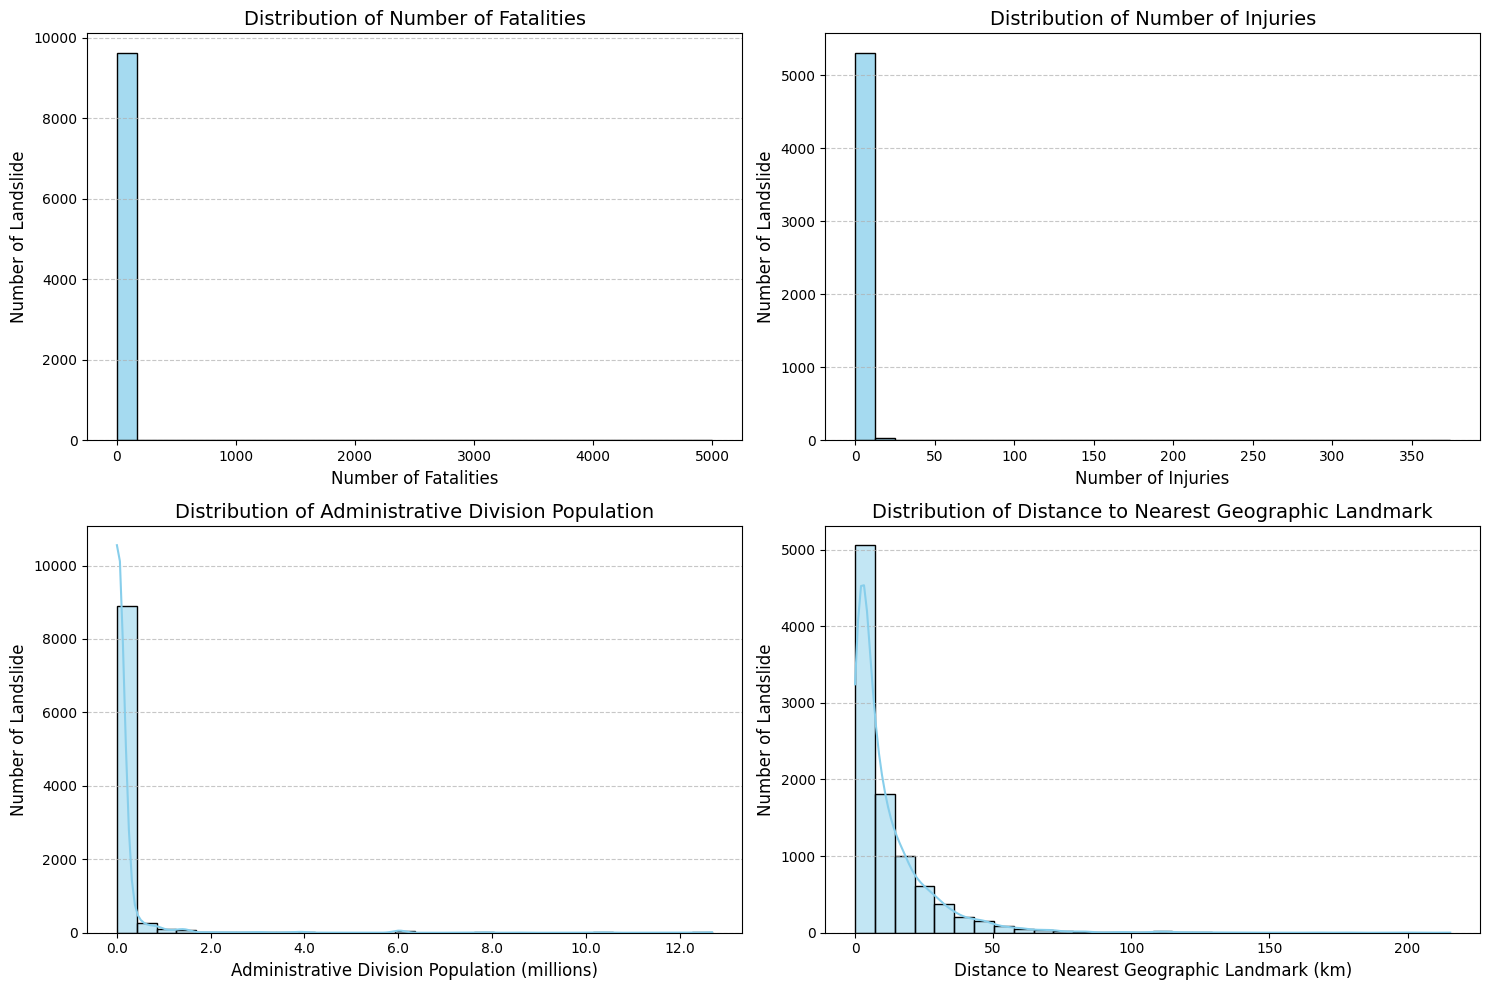

In [14]:
# Hàm format tick: chia 1.000.000 để chuyển sang đơn vị triệu
def millions(x, pos):
    return '{:,.1f}'.format(x / 1_000_000)

# Danh sách các cột cần vẽ
cols_to_plot = {
    'fatality_count': 'Number of Fatalities', 
    'injury_count': 'Number of Injuries', 
    'admin_division_population': 'Administrative Division Population', 
    'gazeteer_distance': 'Distance to Nearest Geographic Landmark'
}

n_cols = 2
n_rows = 2

plt.figure(figsize=(15, 5 * n_rows))

for i, (col, col_name) in enumerate(cols_to_plot.items()):
    # Tạo vị trí cho từng biểu đồ
    ax = plt.subplot(n_rows, n_cols, i + 1)
    
    if col == 'gazeteer_distance':
        sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue', edgecolor='black', ax=ax)
        ax.set_xlabel(col_name + ' (km)', fontsize=12)
    elif col == 'admin_division_population':
        sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue', edgecolor='black', ax=ax)
        ax.xaxis.set_major_formatter(FuncFormatter(millions))
        ax.set_xlabel(col_name + ' (millions)', fontsize=12)
    else:
        sns.histplot(df[col].dropna(), bins=30, color='skyblue', edgecolor='black', ax=ax)
        ax.set_xlabel(col_name, fontsize=12)
        
    # Trang trí
    ax.set_title(f'Distribution of {col_name}', fontsize=14)
    ax.set_ylabel('Number of Landslide', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Nhận xét:**
- Hai biến fatality_count (số người tử vong) và injury_count (số người bị thương) có phân phối lệch phải rất mạnh. Phần lớn các vụ sạt lở không gây thiệt hại về người hoặc chỉ gây thiệt hại rất nhỏ, thể hiện qua số lượng lớn giá trị bằng 0 hoặc gần 0.
- Hai biến admin_division_population (dân số của đơn vị hành chính) và gazeteer_distance (khoảng cách từ vị trí sạt lở đến điểm mốc địa lý gần nhất) là các biến liên tục và thể hiện sự phân tán lớn trong dữ liệu, có phân phối lệch phải.

#### Thống kê mô tả

In [15]:
pd.set_option('display.float_format', '{:.2f}'.format)
cols_numeric = ['fatality_count', 'injury_count', 'admin_division_population', 'gazeteer_distance']
print("--- THỐNG KÊ MÔ TẢ CƠ BẢN ---")
df[cols_numeric].describe()

--- THỐNG KÊ MÔ TẢ CƠ BẢN ---


,fatality_count,injury_count,admin_division_population,gazeteer_distance
count,9648.00,5359.00,9471.00,9471.00
mean,3.22,0.75,157760.05,11.87
std,59.89,8.46,829734.54,15.60
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,1963.00,2.36
50%,0.00,0.00,7365.00,6.25
75%,1.00,0.00,34021.00,15.82
max,5000.00,374.00,12691836.00,215.45


**Nhận xét:**
1. Nhóm biến về thiệt hại con người (fatality_count, injury_count):
- Trung vị (50%) = 0: Với cả số người chết và bị thương, giá trị trung vị là 0. Điều này nghĩa là hơn 50% số vụ sạt lở trong dữ liệu không gây thiệt hại về người (hoặc không được báo cáo).
- Phân vị thứ 3 (75%) của fatality là 1: Nghĩa là 75% các vụ sạt lở có số người chết nhỏ hơn hoặc bằng 1.
- fatality_count: Mean (3.22) lớn hơn nhiều so với Median (0), min = 0 và max = 5000, độ lệch chuẩn là 59.89. Biến này bị lệch phải cực nặng.
- injury_count: Mean (0.75) lớn hơn so với Median (0), min = 0 và max = 374, độ lệch chuẩn là 8.46. Biến này cũng bị lệch phải.

2. Biến dân số (admin_division_population):
- min = 0, max = 12691836
- Mean (157k) lớn hơn nhiểu so với Median (7.3k). Biến này bị lệch phải cực nặng.

3. Biến khoảng cách (gazeteer_distance):
- Median (6.25 km): 50% các vụ sạt lở nằm trong bán kính khoảng 6km so với một địa danh.
- min = 0, max = 215 km cho thấy sạt lở có thể xảy ra ngay tại một địa danh hoặc rất xa địa danh.

-> Các giá trị min/max đều hợp lý và phản ánh đúng thực tế khắc nghiệt của thiên tai

### 2.2. Phạm vi và Giá trị ngoại lai

--- PHÂN TÍCH CỘT: fatality_count ---
Giá trị Min: 0.0 | Max: 5000.0
Ngưỡng dưới (Lower Bound): -1.50
Ngưỡng trên (Upper Bound): 2.50
Số lượng giá trị ngoại lai: 1409 (12.82%)


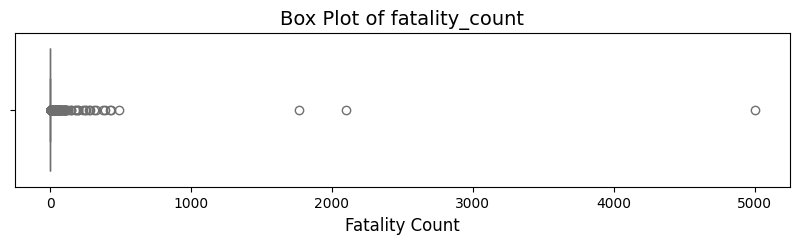



--- PHÂN TÍCH CỘT: injury_count ---
Giá trị Min: 0.0 | Max: 374.0
Ngưỡng dưới (Lower Bound): 0.00
Ngưỡng trên (Upper Bound): 0.00
Số lượng giá trị ngoại lai: 575 (5.23%)


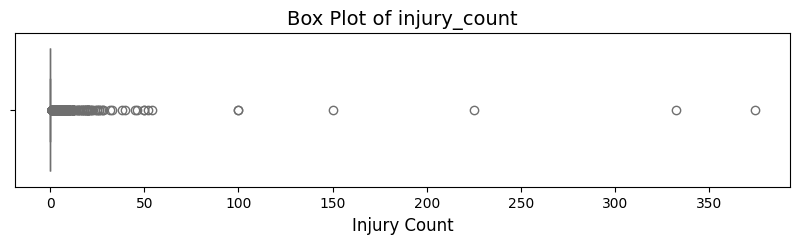



--- PHÂN TÍCH CỘT: admin_division_population ---
Giá trị Min: 0.0 | Max: 12691836.0
Ngưỡng dưới (Lower Bound): -46124.00
Ngưỡng trên (Upper Bound): 82108.00
Số lượng giá trị ngoại lai: 1497 (13.62%)


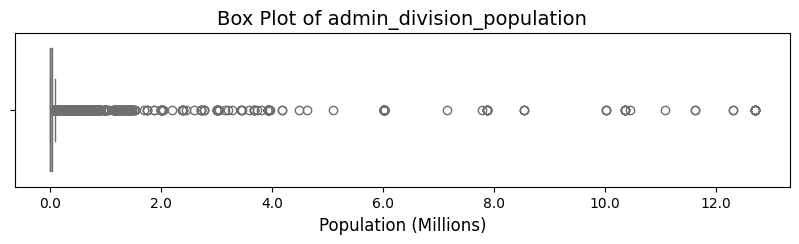



--- PHÂN TÍCH CỘT: gazeteer_distance ---
Giá trị Min: 3e-05 | Max: 215.44888
Ngưỡng dưới (Lower Bound): -17.82
Ngưỡng trên (Upper Bound): 36.00
Số lượng giá trị ngoại lai: 617 (5.62%)


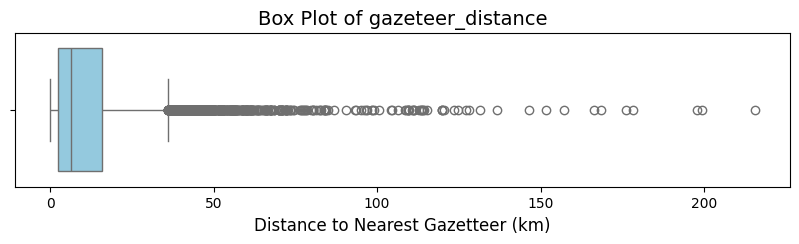

In [46]:
for col in cols_numeric:
        print(f"--- PHÂN TÍCH CỘT: {col} ---")
        
        # 1. Tính toán các thông số IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # 2. Xác định ngoại lai
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / len(df)) * 100
        
        # 3. In kết quả thống kê
        print(f"Giá trị Min: {df[col].min()} | Max: {df[col].max()}")
        print(f"Ngưỡng dưới (Lower Bound): {lower_bound:.2f}")
        print(f"Ngưỡng trên (Upper Bound): {upper_bound:.2f}")
        print(f"Số lượng giá trị ngoại lai: {outlier_count} ({outlier_percentage:.2f}%)")
        
        # Kiểm tra tính hợp lý sơ bộ
        if df[col].min() < 0:
            print("(!) CẢNH BÁO: Có giá trị âm bất hợp lý.")
        
        # 4. Trực quan hóa bằng Boxplot
        plt.figure(figsize=(10, 2))
        ax = sns.boxplot(x=df[col], color='skyblue')
        plt.title(f"Box Plot of {col}", fontsize=14)
    
        if col == 'admin_division_population':
            ax.xaxis.set_major_formatter(FuncFormatter(millions))
            plt.xlabel("Population (Millions)", fontsize=12)
        elif col == 'gazeteer_distance':
            plt.xlabel("Distance to Nearest Gazetteer (km)", fontsize=12)
        else:
            plt.xlabel(col.replace('_', ' ').title(), fontsize=12)
            
        plt.show()
        print("\n" + "="*50 + "\n")

**Nhận xét:**
- Giá trị min/max đều hợp lý, không có lỗi nhập liệu. Tuy nhiên, nhìn vào kết quả có thể thấy giá trị max khá lớn ở các cột:
    + Về số người chết, số người bị thương chứng tỏ có những vụ sạt lở xảy ra có thương vong cao.
    + Về dân số thì do đơn vị hành chính có thể là xã (vài nghìn dân) hoặc thành phố (vài triệu dân).
    + Về khoảng cách đến mốc địa lý cho thấy một số vụ sạt lở xảy ra ở vùng cực kỳ hẻo lánh hoặc có thể do sai số tọa độ GPS khi thu thập.
- Biểu đồ boxplot của các cột cho thấy các cột có rất nhiều điểm ngoại lai, dựa vào phương pháp IQR thì số lượng điểm ngoại lai của các cột chiếm khoảng từ 5% đến 14%.
- Các giá trị ngoại lai là giá trị cực đoan thực sự, không phải lỗi nhập liệu. Trong bối cảnh thiên tai, các giá trị này phản ánh các sự kiện sạt lở nghiêm trọng và có ý nghĩa thực tế, do đó không cần phải loại bỏ.

### 2.3. Chất lượng dữ liệu

In [54]:
quality_report = []
for col in cols_numeric:
    # 1. Tính tỷ lệ giá trị thiếu
    missing_count = df[col].isnull().sum()
    percent_missing = (missing_count / len(df)) * 100

    # 2. Tìm giá trị bất khả thi (Ví dụ: Số âm)
    impossible_count = (df[col] < 0).sum()

    # 3. Tìm giá trị giữ chỗ (Placeholders) 
    # Thường là 0 (cho dân số/khoảng cách), -1, hoặc 999
    placeholders = [0, -1, 999, 9999]
    placeholder_detected = {}
    for p in placeholders:
        count = (df[col] == p).sum()
        if count > 0:
            placeholder_detected[p] = count

    quality_report.append({
        "Column": col,
        "Missing (%)": f"{percent_missing:.2f}%",
        "Impossible (<0)": impossible_count,
        "Placeholders Found": placeholder_detected
    })

quality_df = pd.DataFrame(quality_report)

# Chạy kiểm tra
quality_df

,Column,Missing (%),Impossible (<0),Placeholders Found
0,fatality_count,12.60%,0,{0: 7165}
1,injury_count,51.64%,0,{0: 4739}
2,admin_division_population,14.22%,0,{0: 1123}
3,gazeteer_distance,14.22%,0,{}


**Nhận xét**:
- Cột `injury_count` có tỷ lệ thiếu cao nhất (51,64%).
- Tất cả 4 cột số này không có giá trị âm.
- Giá trị giữ chỗ:
    + Cột `fatality_count` và `injury_count`: Giá trị 0 là hợp lý (vì có những vụ sạt lở không ai chết).
    + Cột `admin_division_population`: Giá trị 0 thường là giá trị dữ chỗ (vì không có đơn vị hành chính nào có dân số bằng 0).
    + Cột `gazeteer_distance`: Không có giá trị dữ chỗ.

## **3. Phân tích các cột phân loại**
Xét các cột phân loại sau: `location_accuracy, landslide_category, landslide_trigger, landslide_size, landslide_setting, country_name`                    

### 3.1. Phân phối giá trị

#### 3.1.1. Các cột phân loại có bao nhiêu giá trị duy nhất?

In [18]:
cols_category = ['location_accuracy', 'landslide_category', 'landslide_trigger', 'landslide_size', 'landslide_setting', 'country_name']
for col in cols_category:
    print(f"\nSố lượng giá trị duy nhất của cột \"{col}\" là: {df[col].nunique()}")


Số lượng giá trị duy nhất của cột "location_accuracy" là: 9

Số lượng giá trị duy nhất của cột "landslide_category" là: 14

Số lượng giá trị duy nhất của cột "landslide_trigger" là: 18

Số lượng giá trị duy nhất của cột "landslide_size" là: 6

Số lượng giá trị duy nhất của cột "landslide_setting" là: 14

Số lượng giá trị duy nhất của cột "country_name" là: 141


**Làm rõ ý nghĩa của các giá trị của từng cột để hỗ trợ quá trình phân tích:**

Các cột `location_accuracy, country_name` đã đủ ý nghĩa, không cần làm rõ

In [19]:
print(f"Các giá trị duy nhất của cột \"location_accuracy\" là:\n {df['location_accuracy'].unique()}")
print(f"Các giá trị duy nhất của cột \"country_name\" là:\n {df['country_name'].unique()}")

Các giá trị duy nhất của cột "location_accuracy" là:
 ['unknown' '5km' '10km' '25km' 'exact' '1km' '50km' nan '250km' '100km']
Các giá trị duy nhất của cột "country_name" là:
 ['China' 'United States' 'Peru' 'Nepal' 'Philippines' 'Mexico' nan
 'Algeria' 'Malaysia' 'Indonesia' 'Sierra Leone' 'Brunei' 'Italy' 'India'
 'Australia' 'Japan' 'Brazil' 'Pakistan' 'Canada' 'Ghana'
 'Trinidad and Tobago' 'Panama' 'Austria' 'United Kingdom' 'El Salvador'
 'Thailand' 'Colombia' 'Jamaica' 'Vietnam' 'Bangladesh' 'Switzerland'
 'Costa Rica' 'Honduras' 'Bhutan' 'Fiji' 'Georgia' 'Saudi Arabia' 'Kenya'
 'New Zealand' 'Yemen' 'Kyrgyzstan' 'Taiwan' 'Ecuador' 'Ireland'
 'Ivory Coast' 'Dominican Republic' 'Spain' 'Dominica' 'Sri Lanka'
 'Bulgaria' 'Haiti' 'Lebanon' 'Iceland' 'Nicaragua' 'France' 'Guatemala'
 'United Arab Emirates' 'Chile' 'Venezuela' 'South Korea' 'Malawi'
 'Myanmar [Burma]' 'Uganda' 'Argentina' 'Egypt' 'Turkey' 'Puerto Rico'
 'Norway' 'South Africa' 'Russia' 'Nigeria' 'Swaziland' 'Belize'


Giải thích ý nghĩa các giá trị của các cột `landslide_category, landslide_trigger, landslide_size, landslide_setting`

Cột `landslide_category`:

In [20]:
print(f"Các giá trị duy nhất của cột \"landslide_category\" là : {df['landslide_category'].unique()}")

Các giá trị duy nhất của cột "landslide_category" là : ['landslide' 'mudslide' 'complex' 'rock_fall' 'debris_flow'
 'riverbank_collapse' 'other' 'unknown' 'lahar' 'snow_avalanche' 'creep'
 'earth_flow' 'translational_slide' nan 'topple']


- **landsile (Sạt lở đất nói chung)**: Thường dùng khi không xác định rõ cơ chế cụ thể hoặc là sự trượt của một khối đất đá dọc theo một mặt trượt.
- **mudslide (Lũ bùn)**: Dòng chảy chứa rất nhiều nước và vật liệu hạt mịn (sét, bùn). Tốc độ rất nhanh và cực kỳ nguy hiểm.
- **complex (Sạt lở phức hợp)**: Sự kết hợp của hai hoặc nhiều kiểu di chuyển (ví dụ: ban đầu là trượt khối đá, sau đó biến thành dòng bùn đá).
- **rock_fall (Đá rơi)**: Các khối đá tách rời khỏi vách đá dốc đứng và rơi tự do hoặc nảy xuống dưới.
- **debris_flow (Dòng vụn vật)**: Tương tự lũ bùn nhưng chứa vật liệu thô hơn (đá hộc, cành cây).
- **riverbank_collapse (Sạt lở bờ sông)**: Sự mất ổn định xảy ra dọc theo bờ sông do dòng chảy xói mòn chân bờ.
- **lahar (Dòng bùn núi lửa)**: Một loại dòng vụn vật đặc biệt xảy ra trên sườn núi lửa, cấu thành từ tro bụi núi lửa và nước.
- **snow_avalanche (Tuyết lở)**: Sự di chuyển nhanh của khối tuyết xuống dốc. Dù là tuyết nhưng cơ chế vật lý rất giống sạt lở đất.
- **creep (Trườn đất)**: Sự di chuyển cực kỳ chậm (vài mm/năm) của lớp đất mặt.
- **earth_flow (Dòng đất)**: Đất bão hòa nước chảy xuống dốc như một chất lỏng nhớt. Tốc độ thường chậm hơn mudslide.
- **translational_slide (Trượt tịnh tiến)**: Khối đất đá trượt dọc theo một mặt phẳng tương đối phẳng (như mặt đứt gãy hoặc mặt lớp đá).
- **topple (Đá đổ)**: Khối đá bị nghiêng về phía trước và đổ sập xuống quanh một điểm tựa ở chân khối.

Cột `landslide_trigger`:

In [21]:
print(f"Các giá trị duy nhất của cột \"landslide_trigger\" là : {df['landslide_trigger'].unique()}")

Các giá trị duy nhất của cột "landslide_trigger" là : ['rain' 'downpour' 'monsoon' 'tropical_cyclone' 'unknown'
 'continuous_rain' 'dam_embankment_collapse' 'no_apparent_trigger' nan
 'other' 'leaking_pipe' 'construction' 'snowfall_snowmelt' 'mining'
 'flooding' 'earthquake' 'freeze_thaw' 'volcano' 'vibration']


- **rain (Mưa)**: Các trận mưa thông thường có cường độ vừa phải nhưng đủ để làm tăng áp suất nước lỗ rỗng trong đất.
- **downpour (Mưa rào/Mưa xối xả)**: Mưa với cường độ cực lớn trong thời gian ngắn, thường là tác nhân trực tiếp gây ra lũ bùn và sạt lở đá.
- **monsoon (Mưa gió mùa)**: Mưa kéo dài trên diện rộng và nhiều ngày trong mùa mưa, làm đất bị bão hòa nước hoàn toàn.
- **continuous_rain (Mưa liên tục)**: Mưa không ngắt quãng trong thời gian dài, làm mực nước ngầm dâng cao và làm yếu các mái dốc.
- **tropical_cyclone (Bão nhiệt đới)**: Sự kết hợp giữa mưa cực lớn và gió mạnh, gây ra sạt lở trên quy mô lớn và lũ lụt đi kèm.
- **snowfall_snowmelt (Tuyết rơi/Tuyết tan)**: Quá trình tuyết tan thấm nước vào đất hoặc sức nặng của lớp tuyết mới rơi làm mất ổn định sườn dốc.
- **freeze_thaw (Đóng băng - Tan băng)**: Nước lọt vào kẽ đá, đóng băng nở ra làm nứt đá, sau đó tan ra khiến khối đá không còn sự liên kết và rơi xuống.
- **earthquake (Động đất)**: Các rung chấn mặt đất làm đứt gãy sự liên kết của đất đá, gây ra sạt lở ngay lập tức hoặc tạo ra các vết nứt cho các trận mưa sau.
- **volcano (Núi lửa)**: Hoạt động phun trào hoặc rung động do núi lửa, thường dẫn đến các dòng bùn nhiệt (lahar) cực kỳ nguy hiểm.
- **flooding (Lũ lụt)**: Nước sông hồ dâng cao gây xói mòn mạnh vào chân các mái dốc, làm sụp đổ cấu trúc phía trên.
- **dam_embankment_collapse (Vỡ đập/Vỡ bờ bao)**: Sự cố vỡ các cấu trúc ngăn nước tạo ra dòng chảy lũ quét đột ngột và sạt lở đất cưỡng bức.
- **construction (Xây dựng)**: Các hoạt động đào đắp, xẻ núi làm đường hoặc xây dựng công trình làm thay đổi độ dốc tự nhiên của địa hình.
- **mining (Khai thác khoáng sản)**: Việc nổ mìn, đào hầm lò hoặc chất đống bãi thải quặng gây mất cân bằng địa chất khu vực.
- **leaking_pipe (Rò rỉ đường ống)**: Nước từ các đường ống ngầm bị vỡ thấm dần vào đất, tạo ra các túi nước ngầm cục bộ gây sạt lở ngầm.
- **vibration (Rung động)**: Các chấn động từ máy móc công nghiệp, xe tải nặng hoặc hoạt động quân sự tác động liên tục lên nền đất yếu.
- **no_apparent_trigger (Không có tác nhân rõ ràng)**: Sạt lở xảy ra do quá trình phong hóa tự nhiên tích lũy qua hàng chục năm, đến thời điểm tự rơi mà không cần mưa hay động đất.

Cột `landslide_size`:

In [22]:
print(f"Các giá trị duy nhất của cột \"landslide_size\" là : {df['landslide_size'].unique()}")

Các giá trị duy nhất của cột "landslide_size" là : ['large' 'small' 'medium' 'unknown' 'very_large' nan 'catastrophic']


- **small (Nhỏ)**: Các vụ sạt lở có quy mô hạn chế, thể tích vật liệu thường dưới 1.000 m³. Thông thường chỉ gây ảnh hưởng cục bộ, ví dụ như làm tắc nghẽn một phần con lộ nhỏ hoặc ảnh hưởng đến một hộ gia đình.
- **medium (Trung bình)**: Các vụ sạt lở có thể tích vật liệu từ 1.000 m³ đến 100.000 m³. Quy mô này đủ để lấp hoàn toàn một đoạn đường quốc lộ hoặc phá hủy một vài ngôi nhà.
- **large (Lớn)**: Các vụ sạt lở có quy mô lớn, thể tích vật liệu từ 100.000 m³ đến 1.000.000 m³. Thường gây thiệt hại nặng nề cho hạ tầng, làm thay đổi địa hình và ảnh hưởng đến cả một khu vực dân cư.
- **very_large (Rất lớn)**: Quy mô cực lớn với thể tích vật liệu trên 1.000.000 m³. Những vụ này thường xóa sổ toàn bộ các ngôi làng, làm lấp dòng chảy của sông hoặc gây ra những thay đổi địa chất đáng kể trên diện rộng.
- **catastrophic (Thảm khốc)**: Đây là mức độ cao nhất, thường dùng cho các vụ sạt lở mang tính thảm họa quốc gia. Nó không chỉ nằm ở thể tích đất đá (thường rất khổng lồ) mà còn ở sức tàn phá kinh khủng, gây thương vong lớn và thiệt hại kinh tế không thể đo đếm ngay lập tức.

Cột `landslide_setting`:

In [23]:
print(f"Các giá trị duy nhất của cột \"landslide_setting\" là : {df['landslide_setting'].unique()}")

Các giá trị duy nhất của cột "landslide_setting" là : ['mine' 'unknown' 'above_road' 'urban' 'natural_slope' nan
 'engineered_slope' 'below_road' 'above_river' 'retaining_wall' 'other'
 'above_coast' 'bluff' 'burned_area' 'deforested_slope']


- **above_road (Phía trên đường)**: Sạt lở xảy ra ở mái dốc phía trên đường giao thông, đất đá đổ xuống mặt đường. Đây là trường hợp rất phổ biến khi xẻ núi làm đường.    
- **below_road (Phía dưới đường)**: Sạt lở xảy ra ở phần ta-luy âm (phần nền đường phía vực). Thường do nền đường yếu hoặc thoát nước kém làm sụt lộ.
- **retaining_wall (Tường chắn)**: Sạt lở xảy ra tại vị trí có tường chắn đất. Điều này cho thấy sự cố về mặt kỹ thuật hoặc áp lực đất/nước vượt quá sức chịu tải của tường.
- **engineered_slope (Mái dốc kỹ thuật)**: Sạt lở xảy ra ở các mái dốc đã được gia cố hoặc thiết kế bởi con người nhưng vẫn bị đổ vỡ.
- **natural_slope (Mái dốc tự nhiên)**: Sạt lở xảy ra ở những vùng hoang sơ, không có sự tác động trực tiếp của con người vào địa hình.
- **burned_area (Vùng bị cháy)**: Sạt lở xảy ra tại khu vực vừa bị cháy rừng. Do lớp phủ thực vật bị mất và rễ cây chết, đất không còn gì bám giữ nên rất dễ sạt khi có mưa.
- **deforested_slope (Mái dốc bị mất rừng)**: Sạt lở tại nơi rừng bị chặt phá để làm nương rẫy hoặc khai thác gỗ.
- **bluff (Vách đá đứng/Vách đất)**: Sạt lở tại các vách dốc đứng, thường thấy ở vùng cao nguyên hoặc ven thung lũng.
- **above_river (Phía trên sông)**: Sạt lở xảy ra ở bờ sông hoặc mái dốc đổ trực tiếp xuống lòng sông.
- **above_coast (Phía trên bờ biển)**: Sạt lở xảy ra ở các vách đá ven biển, thường do sóng đánh vào chân vách (xói mòn chân).
- **urban (Đô thị)**: Sạt lở xảy ra trong khu vực thành phố, thị trấn. Thường liên quan đến mật độ xây dựng dày đặc hoặc hệ thống thoát nước kém.
- **mine (Khu vực khai thác mỏ)**: Sạt lở tại các hầm mỏ hoặc bãi thải xỉ quặng.

#### 3.1.2. Biểu đồ trực quan các cột

C:\Users\thuduc2\AppData\Local\Temp\ipykernel_7940\2853547015.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(category_labels_display)


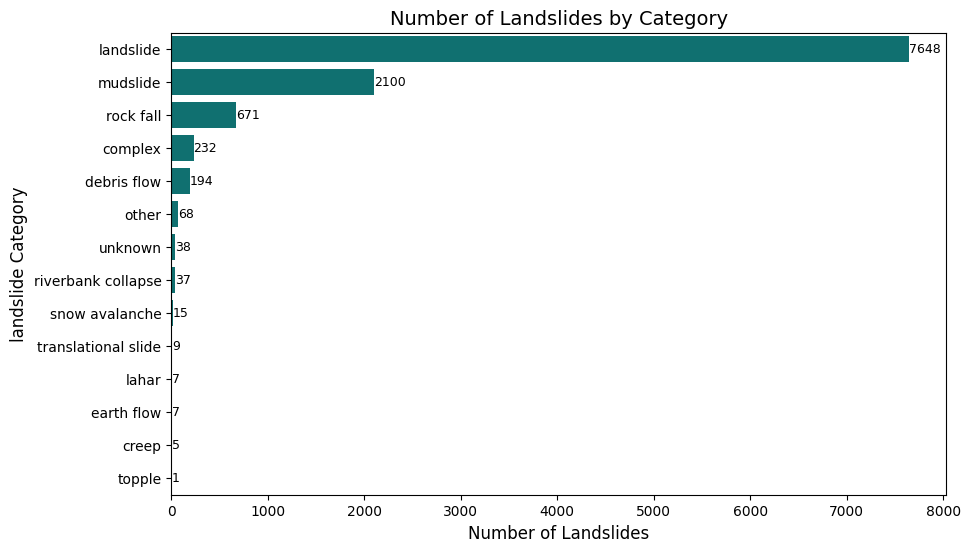

In [24]:
# --- 1. landslide_category ---
plt.figure(figsize=(10, 6))

category_labels_display = [val.replace('_',' ') for val in df.landslide_category.value_counts().index]

ax = sns.countplot(
    y='landslide_category',
    data=df,
    order=df['landslide_category'].value_counts().index,
    color='teal'
)
plt.title('Number of Landslides by Category', fontsize=14)
plt.xlabel('Number of Landslides', fontsize=12)
plt.ylabel('landslide Category', fontsize=12)
ax.set_yticklabels(category_labels_display)
for p in ax.patches:
    ax.annotate(int(p.get_width()), (p.get_width(), p.get_y() + p.get_height()/2.),
                ha='left', va='center', fontsize=9)

plt.show()

**Nhận xét:**
- Nhóm sạt lở (landslide) chiếm số lượng lớn khoảng 7600 vụ. Chứng tỏ trong quá trình thu thập dữ liệu, người ghi nhận thường sử dụng thuật ngữ "sạt lở" thay vì phân loại chi tiết ra.
- Nhóm chiếm số lượng vụ đứng thứ 2 là lũ bùn (mudslide).
- Các nhóm còn lại có số lượng vụ rất ít.

C:\Users\thuduc2\AppData\Local\Temp\ipykernel_7940\2661804122.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(trigger_labels_display)


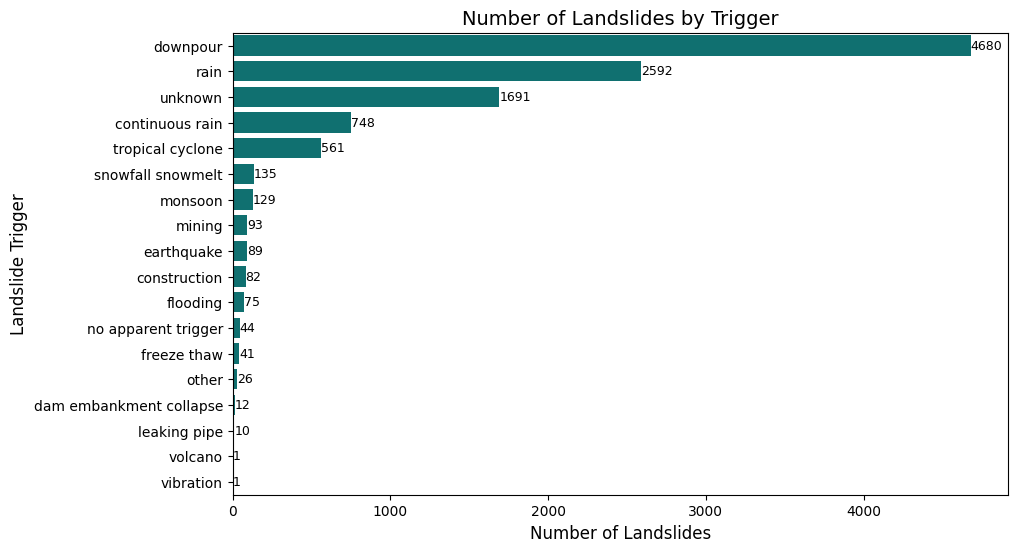

In [25]:
# --- 2. landslide_trigger ---
plt.figure(figsize=(10, 6))

trigger_labels_display = [val.replace('_',' ') for val in df.landslide_trigger.value_counts().index]

ax = sns.countplot(
    y='landslide_trigger',
    data=df,
    order=df['landslide_trigger'].value_counts().index,
    color='teal'
)
plt.title('Number of Landslides by Trigger', fontsize=14)
plt.xlabel('Number of Landslides', fontsize=12)
plt.ylabel('Landslide Trigger', fontsize=12)
ax.set_yticklabels(trigger_labels_display)
for p in ax.patches:
    ax.annotate(int(p.get_width()), (p.get_width(), p.get_y() + p.get_height()/2.),
                ha='left', va='center', fontsize=9)
    
plt.show()

**Nhận xét:**
- Mưa là nguyên nhân chính, các yếu tố liên quan đến nước và thời tiết là nguyên nhân áp đảo gây ra sạt lở như mưa lớn (downpour) khoảng hơn 4500 vụ, mưa thường (rain) khoảng 2500 vụ, mưa liên tục (continuous rain), bão nhiệt đới (tropical cyclone), gió mùa (monsoon), lũ lụt (flooding).
- Nhóm không xác định (unknown) cũng có số lượng rất cao gần 1700 vụ.
- Các nguyên nhân do con người như khai khoáng (mining), xây dựng (construction), vỡ đường ống nước (leaking pipe) có số lượng vụ không nhiều.
- Các nguyên nhân do địa chấn như động đất (earthquake), rung chấn (vibration), núi lửa (volcano) cũng có số lượng rất ít.
- Các nguyên nhân hiếm gặp như tuyết tan (snowfall snowmelt), đóng băng (freeze thaw).

C:\Users\thuduc2\AppData\Local\Temp\ipykernel_7940\1112385717.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(setting_labels_display)


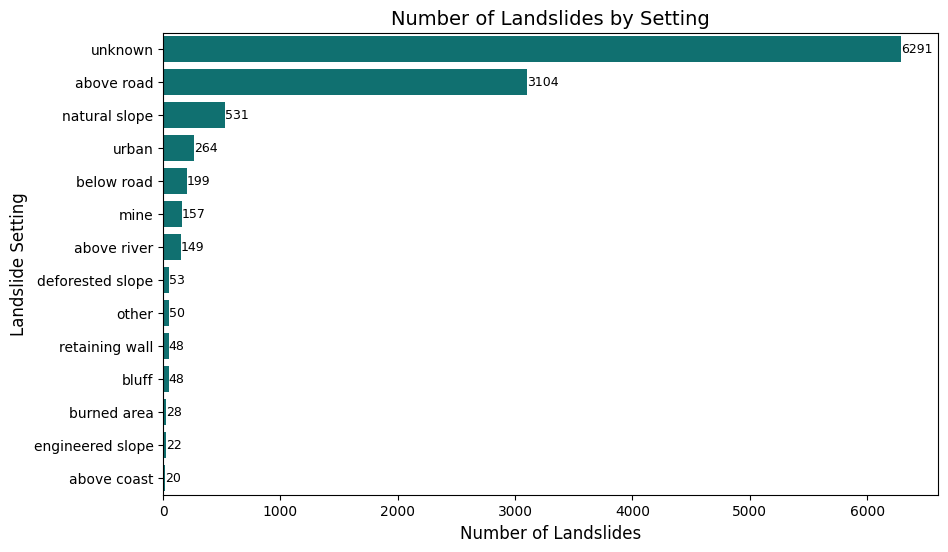

In [26]:
# --- 3. landslide_setting ---
plt.figure(figsize=(10, 6))

setting_labels_display = [val.replace('_',' ') for val in df.landslide_setting.value_counts().index]

ax = sns.countplot(
    y='landslide_setting',
    data=df,
    order=df['landslide_setting'].value_counts().index,
    color='teal'
)
plt.title('Number of Landslides by Setting', fontsize=14)
plt.xlabel('Number of Landslides', fontsize=12)
plt.ylabel('Landslide Setting', fontsize=12)
ax.set_yticklabels(setting_labels_display)
for p in ax.patches:
    ax.annotate(int(p.get_width()), (p.get_width(), p.get_y() + p.get_height()/2.),
                ha='left', va='center', fontsize=9)
    
plt.show()

**Nhận xét:**
- Nhóm không xác định (unknown) chiếm số lượng lớn với hơn 6000 vụ. Chứng tỏ có hơn một nửa số vụ sạt lở không được ghi nhận về bối cảnh môi trường xung quanh.
- Nếu bỏ qua nhóm không xác định thì bối cảnh có số vụ lớn nhất là trên đường (above road) với hơn 3000 vụ.Chứng tỏ xây dựng đường xá là một trong những yếu tố rủi ro lớn nhất dẫn đến sạt lở.
- Các bối cảnh như khu vực bị cháy rừng (burned area), sườn dốc đã được gia cố kỹ thuật (engineered slope), ven biển (above coast) có số lượng vụ được ghi nhận rất ít.

C:\Users\thuduc2\AppData\Local\Temp\ipykernel_7940\1016487147.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(accuracy_labels_display)
C:\Users\thuduc2\AppData\Local\Temp\ipykernel_7940\1016487147.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(size_labels_display)


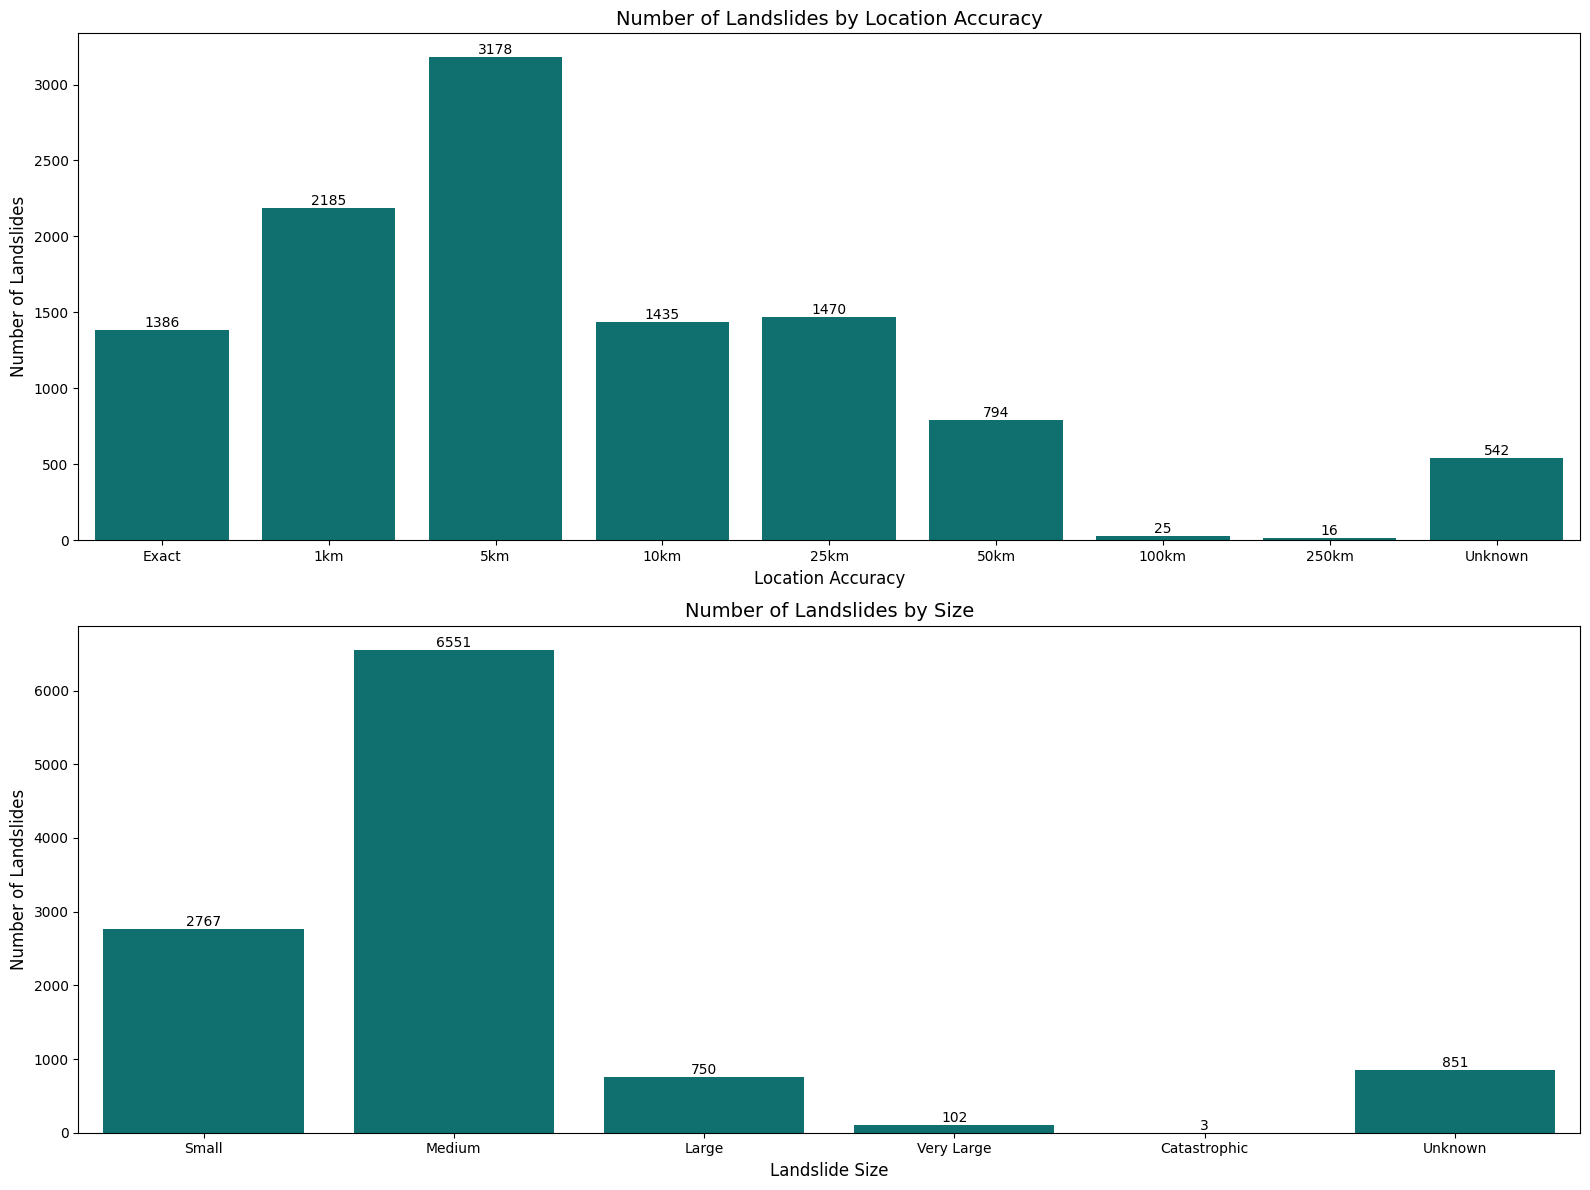

In [27]:
accuracy_order = [
    'exact', '1km', '5km', '10km', '25km', 
    '50km', '100km', '250km', 'unknown'
]

size_order = [
    'small', 'medium', 'large', 'very_large', 
    'catastrophic', 'unknown'
]

# Dùng để hiển thị trên trục hoành
accuracy_labels_display = [
    'Exact', '1km', '5km', '10km', '25km', 
    '50km', '100km', '250km', 'Unknown'
]

size_labels_display = [
    'Small', 'Medium', 'Large', 'Very Large', 
    'Catastrophic', 'Unknown'
]

# Thiết lập biểu đồ
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# --- 4. location_accuracy ---
sns.countplot(
    ax=axes[0],
    x='location_accuracy',
    data=df,
    order=accuracy_order, 
    color='teal'
)
axes[0].set_title('Number of Landslides by Location Accuracy', fontsize=14)
axes[0].set_xlabel('Location Accuracy', fontsize=12)
axes[0].set_ylabel('Number of Landslides', fontsize=12)
axes[0].set_xticklabels(accuracy_labels_display)
for p in axes[0].patches:
    axes[0].annotate(int(p.get_height()), (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=10)
    
# --- 5. landslide_size ---
sns.countplot(
    ax=axes[1],
    x='landslide_size',
    data=df,
    order=size_order, 
    color='teal'
)
axes[1].set_title('Number of Landslides by Size', fontsize=14)
axes[1].set_xlabel('Landslide Size', fontsize=12)
axes[1].set_ylabel('Number of Landslides', fontsize=12)
axes[1].set_xticklabels(size_labels_display)
for p in axes[1].patches:
    axes[1].annotate(int(p.get_height()), (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

**Nhận xét:**
1. Biểu đồ "Number of Landslides by Location Accuracy":
- Phần lớn các vụ sạt lở được ghi nhận với độ chính xác vị trí tương đối tốt. Nhóm 5km chiếm số lượng cao nhất (hơn 3000 vụ), tiếp theo là nhóm 1km (hơn 2000 vụ).
- Số lượng vụ sạt lở có xu hướng giảm dần khi độ chính xác tăng lên (từ 10km đến 250km).
- Số lượng vụ sạt lở có độ chính xác (exact) là khá đáng kể (khoảng 1400 vụ). Tuy nhiên, vẫn có một lượng đáng kể các vụ sạt lở mà độ chính xác vị trí là không xác định (unknown).

2. Biểu đồ "Number of Landslides by Size"
- Nhóm trung bình (medium) chiếm số lượng vượt trội với hơn 6500 vụ sạt lở.
- Nhóm nhỏ (small) là nhóm phổ biến thứ 2 với gần 3000 vụ sạt lở.
- Số lượng vụ sạt lở có quy mô lớn (large), rất lớn (very large) và thảm họa (catastrophic) là rất ít, đặc biệt là nhóm thảm họa. Điều này phản ánh thực tế rằng các sự kiện sạt lở quy mô cực lớn thường hiếm khi xảy ra.
- Nhóm không xác định (unknown) có khoảng 850 vụ, cho thấy vẫn còn nhiều vụ chưa xác định rõ quy mô.

**Insight:** Theo quy luật tự nhiên, sạt lở nhỏ thường xảy ra nhiều hơn sạt lở lớn. Việc nhóm "Small" thấp hơn nhóm "Medium" gợi ý rằng có thể có "thiên kiến báo cáo" (Reporting Bias) – tức là các vụ sạt lở quá nhỏ thường bị bỏ qua không được ghi nhận vào hệ thống.

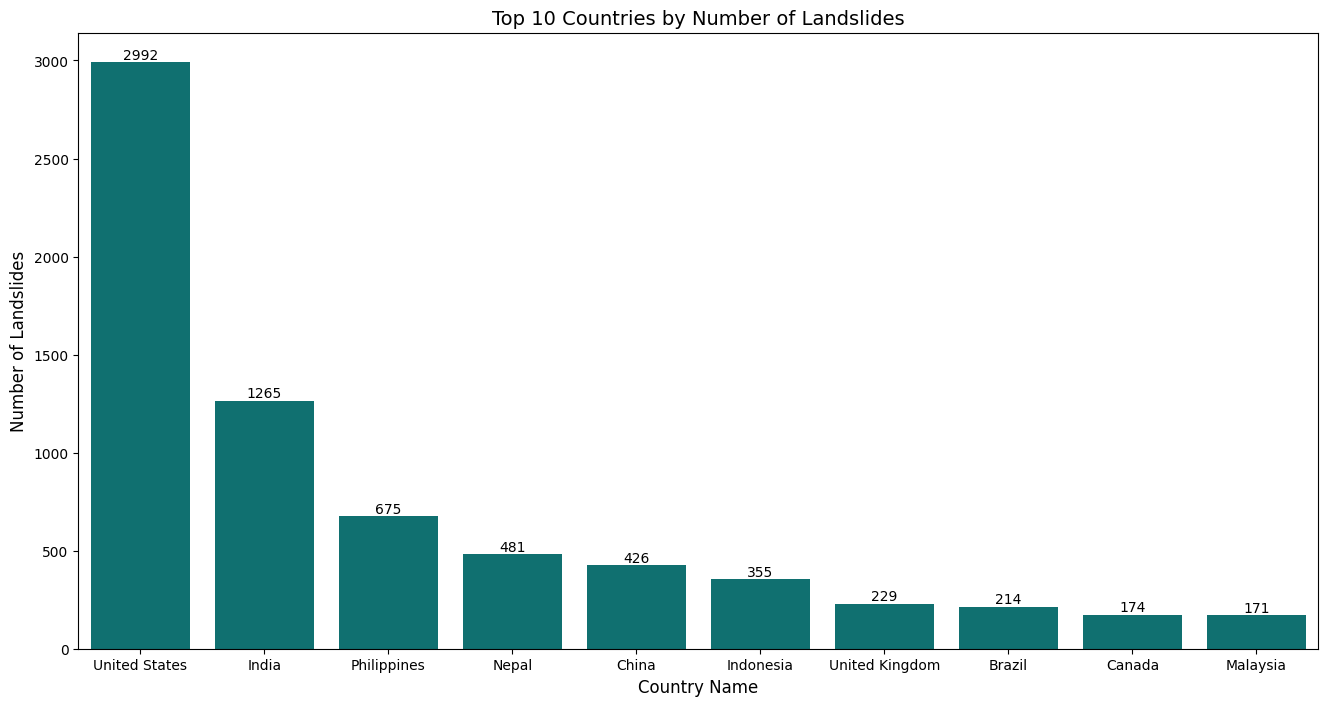

In [28]:
# --- 6. country_name ---
plt.figure(figsize=(16, 8))

ax = sns.countplot(
    x='country_name',
    data=df,
    order=df['country_name'].value_counts().head(10).index,
    color='teal'
)
plt.title('Top 10 Countries by Number of Landslides', fontsize=14)
plt.xlabel('Country Name', fontsize=12)
plt.ylabel('Number of Landslides', fontsize=12)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.show()

**Nhận xét:**
- Mỹ là quốc gia có số lượng báo cáo sạt lở cao nhất trong tập dữ liệu (với gần 3000 vụ), trong khi đó Canada và Malaysia ghi nhận khoảng 175 vụ. Về mặt địa chất, Mỹ không hẳn là nơi xảy ra sạt lở nhiều nhất thế giới, đây là dấu hiệu điển hình của Reporting Bias (Thiên kiến báo cáo) vì NASA có khả năng tiếp cận và ghi nhận các báo cáo từ Mỹ sẽ tốt hơn các quốc gia khác.
- Trong 10 quốc gia thì đa số thuộc Châu Á; còn lại thuộc Bắc Mỹ (United States, Canada), Nam Mỹ (Brazil), Châu Âu (United Kingdom).

#### 3.1.3. Sự phân phối có cân bằng hay bị mất cân bằng nghiêm trọng?
=>> Các biểu đồ của các cột phân loại đều có phân phối bị mất cân bằng

### 3.2. Chất lượng dữ liệu

#### 3.2.1. Tỷ lệ phần trăm giá trị bị thiếu của các cột phân loại

In [29]:
print("Tỷ lệ phần trăm giá trị thiếu của các cột là:")
percent_missing = df[cols_category].isnull().mean().sort_values(ascending=False) * 100
percent_missing = percent_missing.apply(lambda x: f"{x:.2f}%")
print(percent_missing)

Tỷ lệ phần trăm giá trị thiếu của các cột là:
country_name          14.16%
landslide_setting      0.63%
landslide_trigger      0.21%
landslide_size         0.08%
location_accuracy      0.02%
landslide_category     0.01%
dtype: object


**Nhận xét:** Các cột phân loại đa số thiếu dữ liệu rất ít, có cột country_name là thiếu 14.16% nhưng cũng không quá cao.

#### 3.2.2. Có sự không nhất quán trong các danh mục không? Có các giá trị bất ngờ hoặc bất thường không? 

- Tất cả các cột đều chứa giá trị nan, nên thay thế nan bằng unknown để đồng nhất với các giá trị hiện có.
- Đánh giá từng cột:
    + Cột `location_accuracy`: có tính nhất quán khá tốt, không có giá trị bất thường.
    + Cột `landslide_category`: có sự chồng chéo về ngữ nghĩa, "landslide" là thuật ngữ chung, trong khi "mudslide", "rock_fall" là thuật ngữ cụ thể.
    + Cột `landslide_trigger`: Có quá nhiều danh mục chồng chéo liên quan đến "MƯA".
    + Cột `landslide_size`: có tính nhất quán tốt.
    + Cột `landslide_setting`: có tính nhất quán tương đối ổn.
    + Cột `country_name`: có sự không nhất quán và trùng lặp. Trùng lặp tên "Czechia" và "Czech Republic" là một quốc gia, định dạng lạ "Myanmar [Burma]", dữ liệu chứa cả quốc gia độc lập (United States, China) lẫn vùng lãnh thổ phụ thuộc (Hong Kong, U.S. Virgin Islands, Puerto Rico, Guam, American Samoa).

#### 3.2.3. Có các danh mục có rất ít quan sát không? Chúng có nên được gộp nhóm lại không?

- Cột `location_accuracy`: Các giá trị như 100km, 250km có số lượng quan sát rất ít. Có thể gộp 50km, 100km, 250km thành nhóm ">50km".
- Cột `landslide_category`: Các nhóm như lahar, topple, creep, earth_flow, translational_slide, snow_avalanche có số lượng quan sát rất ít. Có thể gộp tất cả các nhóm trên và nhóm unknown vào nhóm other.
- Cột `landslide_trigger`: 
    + Gộp rain, downpour, continuous_rain, flooding, monsoon, tropical_cyclone thành một nhóm lớn là "rain". 
    + Gộp construction, mining, leaking_pipe, dam_embankment_collapse thành một nhóm "anthropogenic".
    + Gộp earthquake, volcano, vibration thành một nhóm "Seismic".
    + Gộp unknown, no_apparent_trigger, snowfall_snowmelt, freeze_thaw thành "other". 
- Cột `landslide_size`: nhóm catastrophic quá nhỏ, có thể gộp vào very_large.
- Cột `landslide_setting`: Có thể gộp above_road và below_road thành "road", gộp các nhóm nhỏ (burned_area, bluff, retaining_wall, above_coast) vào "other".
- Cột `country_name`: Không cần phải gộp.

**=> Kết luận chung**: Nhóm nhận thấy mặc dù có một số giá trị trong cột có khá ít, nhưng chỉ cần thiết gộp theo những chiến lược như trên ở bước xây dựng mô hình, còn về phân tích trả lời câu hỏi thì cần giữ nguyên để có thể hiểu sâu về tập dữ liệu này.

## **4. Phân tích các cột tọa độ**
Xét 2 cột `longitude, latitude`

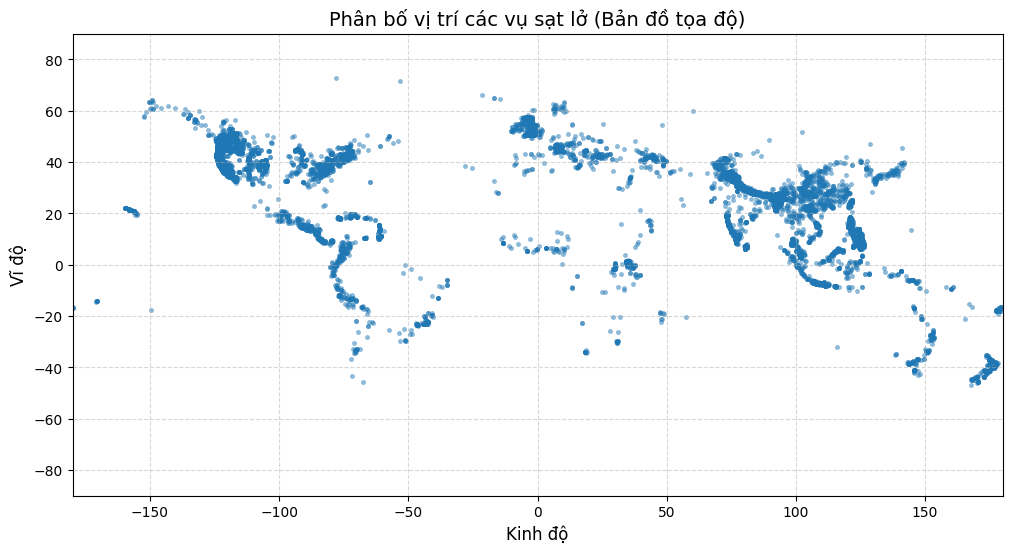

In [30]:
plt.figure(figsize=(12, 6))

# Vẽ Scatter Plot: X là Kinh độ, Y là Vĩ độ
# hue='landslide_category': Tô màu theo loại sạt lở (tùy chọn)
sns.scatterplot(
    data=df, 
    x='longitude', 
    y='latitude', 
    alpha=0.5,       
    s=10,            
    edgecolor=None  
)

plt.title('Phân bố vị trí các vụ sạt lở (Bản đồ tọa độ)', fontsize=14)
plt.xlabel('Kinh độ', fontsize=12)
plt.ylabel('Vĩ độ', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Giới hạn trục để loại bỏ các điểm nhiễu (nếu có)
plt.xlim(-180, 180)
plt.ylim(-90, 90)

plt.show()

In [31]:
print(f"Vĩ độ: min = {df.latitude.min():.2f}, max = {df.latitude.max():.2f}")
print(f"Kinh độ: min = {df.longitude.min():.2f}, max = {df.longitude.max():.2f}")

Vĩ độ: min = -46.77, max = 72.63
Kinh độ: min = -179.98, max = 179.99


**Nhận xét:**
- Tập dữ liệu này không chứa các tọa độ vô lý.
- Các vụ sạt lở có phạm vi hầu hết các Châu lục trên thế giới.
- Châu Á và Bắc Mỹ có số vụ sạt lở dày đặt hơn các Châu lục còn lại.

## **5. Phân tích cột thời gian**
Xét cột `event_date`

In [32]:
# Trích xuất tử cột 'event_date' ra các cột thời gian cụ thể
df['year'] = df['event_date'].dt.year
df['month'] = df['event_date'].dt.month

df[['year', 'month']].head()

,year,month
0,2008,8
1,2009,1
2,2007,1
3,2009,7
4,2010,10


**Biểu đồ trực quan của các cột**

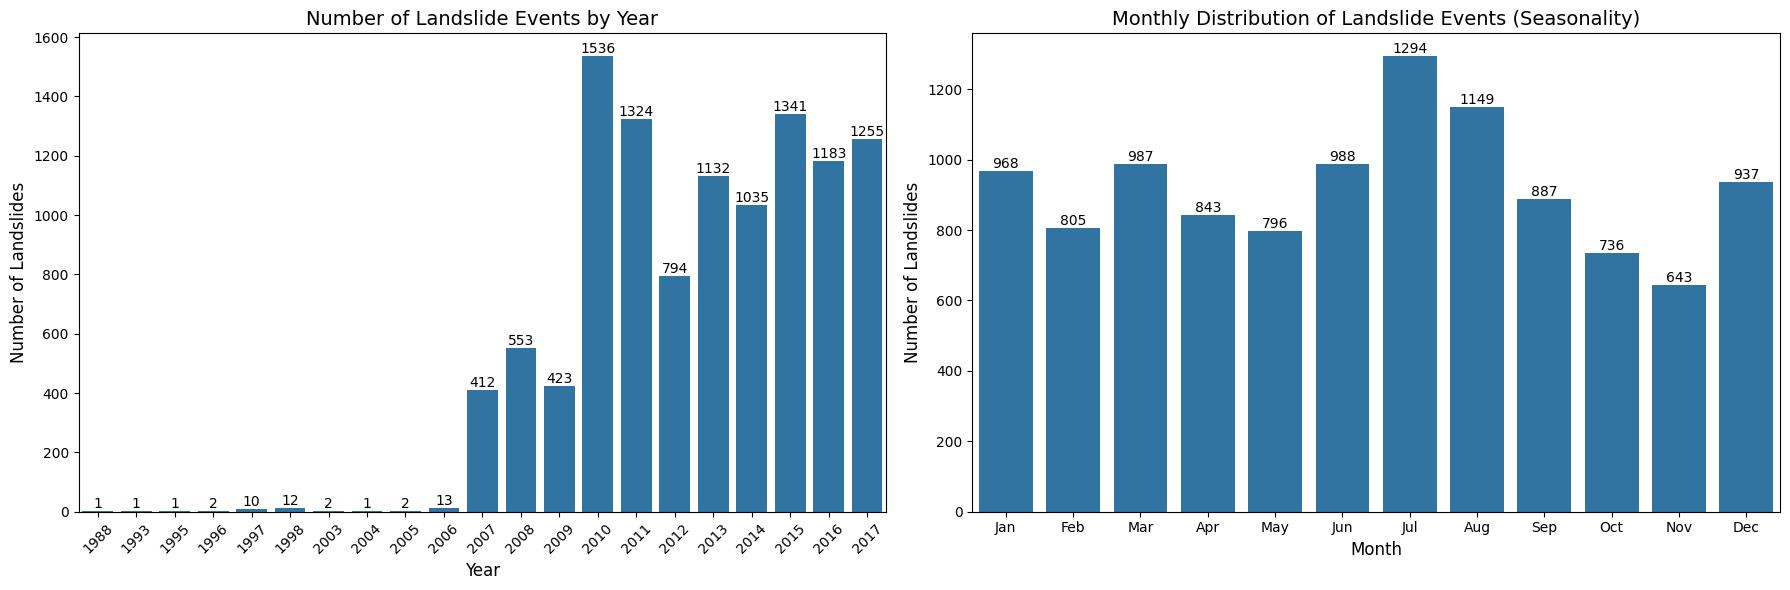

In [33]:
# Thiết lập kích thước
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 1. Xu hướng theo Năm (Year Trend)
sns.countplot(data=df, x='year', ax=axes[0])
axes[0].set_title('Number of Landslide Events by Year', fontsize=14)
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Number of Landslides', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
for p in axes[0].patches:
    axes[0].annotate(int(p.get_height()), (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

# 2. Tính mùa vụ theo Tháng (Seasonality)
sns.countplot(data=df, x='month', ax=axes[1])
axes[1].set_title('Monthly Distribution of Landslide Events (Seasonality)', fontsize=14)
axes[1].set_xlabel('Month', fontsize=12)
axes[1].set_ylabel('Number of Landslides', fontsize=12)
for p in axes[1].patches:
    axes[1].annotate(int(p.get_height()), (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=10)
axes[1].set_xticks(range(0,12), 
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.tight_layout()
plt.show()

**Nhận xét:**
1. Biểu đồ về "Số vụ sạt lở đất theo năm"
- Từ năm 2007 trở đi có số vụ sạt lở rất cao. Trước năm 2007 số lượng vụ sạt lở ghi nhận rất ít (chỉ 1-13 vụ/năm), trong khi từ 2010 trở đi luôn trên 1.000 vụ.
- Những năm trước 2007 rất ít vụ sạt lở nên sẽ được loại bỏ khỏi tập dữ liệu, nhóm sẽ tập trung phân tích từ năm 2007 đến 2017.
2. Biểu đồ về "Phân bố sự kiện sạt lở đất hàng tháng"
- Biểu đồ cho thấy đỉnh điểm sạt lở rơi vào tháng 7 và tháng 8 (trên 1.100 vụ). Các tháng đầu năm và cuối năm có xu hướng thấp hơn.


**Tiền xử lý**  
Xoá các dòng có sự kiện sạt lở trước năm 2007

In [34]:
# Lọc lấy các dòng có năm từ 2007 trở đi
df = df[df['year'] >= 2007]

# Kiểm tra lại số lượng dòng sau khi xóa
print(f"Số lượng bản ghi sau khi lọc: {len(df)}")
print(f"Năm nhỏ nhất hiện tại: {df['year'].min()}")

Số lượng bản ghi sau khi lọc: 10988
Năm nhỏ nhất hiện tại: 2007


## **6. Phân tích dữ liệu bị thiếu**

### 6.1. Đánh giá tổng quan

**Bảng tóm tắt các cột có dữ liệu thiếu**

In [35]:
# 1. Tính toán bảng tóm tắt
df_cols = pd.DataFrame({
    'Count Missing': df.isna().sum(),
    'Percent Missing': df.isna().sum() * 100 / df.shape[0]
})

# 2. Lọc: Chỉ giữ lại các hàng có giá trị thiếu > 0
df_cols = df_cols[df_cols['Count Missing'] > 0]

# 3. Sắp xếp giảm dần theo phần trăm
df_cols = df_cols.sort_values(by='Percent Missing', ascending=False)

df_cols

,Count Missing,Percent Missing
injury_count,5674,51.64
admin_division_name,1637,14.90
gazeteer_closest_point,1563,14.22
country_name,1562,14.22
admin_division_population,1562,14.22
gazeteer_distance,1562,14.22
fatality_count,1385,12.60
landslide_setting,69,0.63
landslide_trigger,23,0.21
landslide_size,9,0.08


**Biểu đồ trực quan hóa các mẫu dữ liệu bị thiếu**

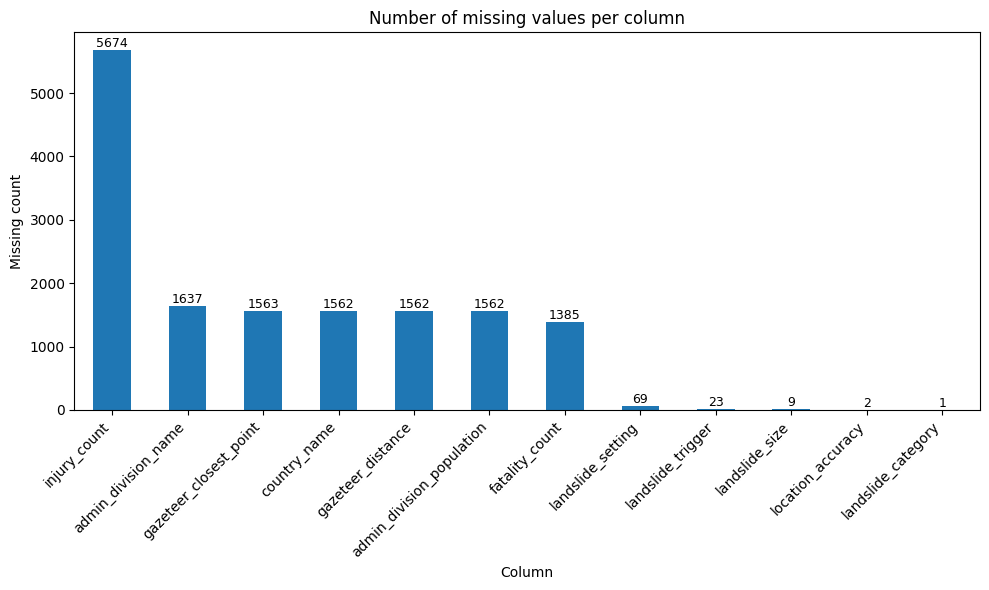

In [36]:
missing_cnt = df.isnull().sum().sort_values(ascending=False)
missing_pct = (df.isnull().mean() * 100).sort_values(ascending=False)

# Bar chart: số missing
plt.figure(figsize=(10,6))
ax = missing_cnt[missing_cnt > 0].plot(kind='bar')
plt.title('Number of missing values per column')
plt.ylabel('Missing count')
plt.xlabel('Column')
plt.xticks(rotation=45, ha='right')

# optional: annotate counts trên bar
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

**Các giá trị thiếu là ngẫu nhiên hay có quy luật? Có hàng hoặc nhóm cụ thể nào có nhiều giá trị thiếu hơn không?**

- Các giá trị thiếu trong bộ dữ liệu này không phải là ngẫu nhiên. Trong thu thập dữ liệu thiên tai, người nhập liệu thường có xu hướng để trống các ô thương vong nếu không có ai bị thương hoặc chết, thay vì điền số 0.
- Cột injury_count (số người bị thương) là cột thiếu dữ liệu nhiều nhất, lên tới 51.43%. Các cột còn lại đều thiếu dưới 15%, tương đối ít.

### 6.2. Chiến lược cho từng cột

**Đối với mỗi cột có giá trị thiếu:**
1. Nhóm dữ liệu thiệt hại con người `injury_count, fatality_count`:
- Các giá trị có thể bị thiếu vì người ghi nhận thường để trống thay vì điền số 0 khi không có thương vong. 
- Kế hoạch xử lý dự kiến: Điền khuyết bằng 0.
2. Nhóm dữ liệu Địa lý/Hành chính `country_name, admin_division_name, admin_division_population, gazeteer_distance, gazeteer_closest_point`:
- Các giá trị có thể bị thiếu vì hệ thống có tọa độ nhưng không tìm thấy tên quốc gia/tỉnh thành tương ứng trong cơ sở dữ liệu.
- Kế hoạch xử lý dự kiến: Điền khuyết bằng "unknown" hoặc "other" đối với biến có kiểu dữ liệu object, điền khuyết bằng 0 đối với biến số.
3. Nhóm dữ liệu phân loại `landslide_trigger, landslide_setting, landslide_accuracy, landslide_category, landslide_size`:
- Các giá trị có thể bị thiếu vì người quan sát không xác định được tại thời điểm đó.
- Kế hoạch xử lý dự kiến: Điền khuyết bằng "unknown" hoặc "other".

=> Về việc xử lý các cột có giá trị thiếu sẽ được thực hiện ở <file tiếp theo> khi trong quá trình trả lời các câu hỏi có ý nghĩa, và những chiến lược ở phần này chỉ mới là dự kiến có thể sẽ xử lý thêm trong quá trình trả lời câu hỏi.

## **7. Mối quan hệ và Tương quan**

### 7.1. Ma trận tương quan cho các biến số và biểu đồ tương quan

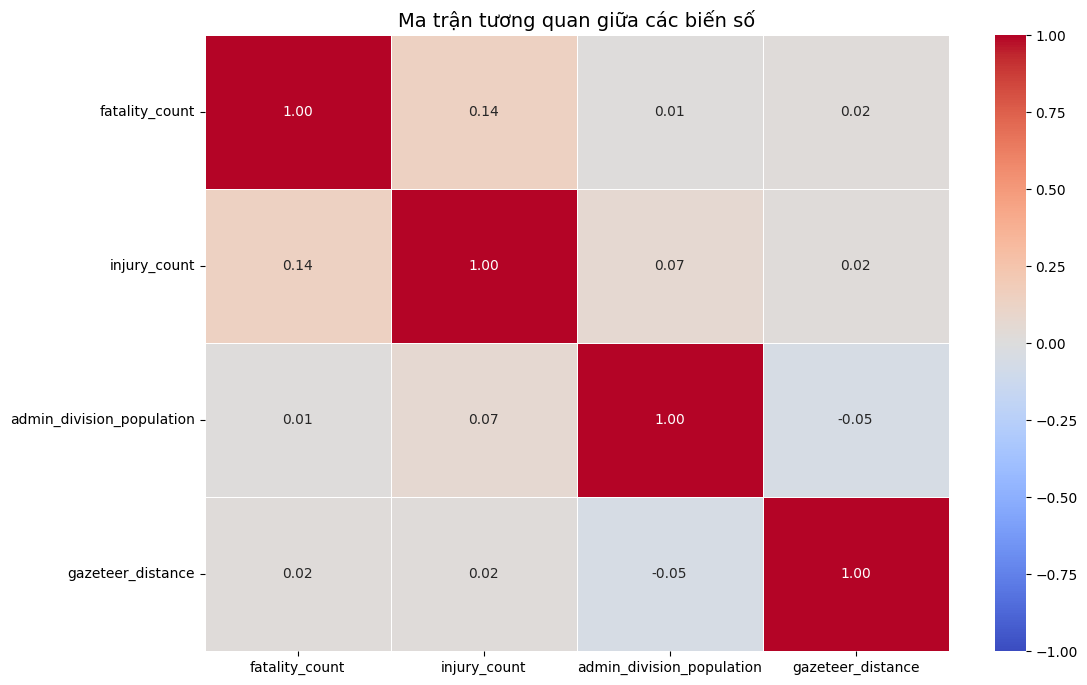

In [37]:
# Lọc dữ liệu
corr_df = df[['fatality_count', 'injury_count', 'admin_division_population', 'gazeteer_distance']].dropna()
# Tính hệ số tương quan
correlation_matrix = corr_df.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title('Ma trận tương quan giữa các biến số', fontsize=14)
plt.show()

**Nhận xét:**
- Không có mối tương quan nào giữa các biến số.
- Tất cả hệ số tương quan đều dưới 0.15, cho thấy mối quan hệ yếu, không xảy ra hiện tượng đa cộng tuyến nghiêm trọng.
- Không có mối quan hệ nào thật sự “đáng ngạc nhiên”.

### 7.2. Bảng chéo

**Tổ hợp quan trọng giữa biến phân loại × biến phân loại**  
1. Xét cặp biến landslide_trigger (Nguyên nhân) và landslide_category (Phân loại sạt lở).

In [38]:
# Tạo bảng tần suất (Số lượng sự kiện)
ct_counts = pd.crosstab(df['landslide_trigger'], df['landslide_category'])

print("Bảng tần suất")
ct_counts


Bảng tần suất


landslide_category,complex,creep,debris_flow,earth_flow,lahar,landslide,mudslide,other,riverbank_collapse,rock_fall,snow_avalanche,topple,translational_slide,unknown
landslide_trigger,,,,,,,,,,,,,,
construction,4,0,0,0,0,52,13,2,1,9,0,0,0,0
continuous_rain,3,1,9,0,0,612,98,1,1,19,0,0,1,1
dam_embankment_collapse,1,0,2,0,1,2,5,0,1,0,0,0,0,0
downpour,121,3,93,0,1,3151,1119,18,10,117,2,1,2,10
earthquake,0,0,1,1,0,53,3,4,1,25,1,0,0,0
flooding,0,0,3,0,0,44,16,0,4,8,0,0,0,0
freeze_thaw,3,0,0,0,0,15,2,0,0,19,0,0,0,0
leaking_pipe,0,0,0,0,0,4,6,0,0,0,0,0,0,0
mining,1,0,0,0,0,69,11,2,0,7,0,0,0,3


**Nhận xét:** Nguyên nhân do mưa lớn là yếu tố chủ yếu dẫn đến sạt lở đất, một phần nó cũng gây ra đá lở.

2. Xét cặp biến landslide_trigger (Nguyên nhân) và landslide_size (Quy mô sạt lở).

In [39]:
print("Bảng tần suất")
pd.crosstab(df['landslide_trigger'], df['landslide_size'])

Bảng tần suất


landslide_size,catastrophic,large,medium,small,unknown,very_large
landslide_trigger,,,,,,
construction,0,2,44,34,1,0
continuous_rain,1,50,421,255,12,6
dam_embankment_collapse,0,2,5,3,0,2
downpour,1,368,3272,922,37,47
earthquake,0,11,46,28,3,1
flooding,0,11,37,22,3,0
freeze_thaw,1,2,15,20,0,1
leaking_pipe,0,0,0,10,0,0
mining,0,6,56,28,1,2


**Nhận xét:** Nguyên nhân do mưa lớn thường gây sạt lở đất quy mô từ nhỏ đến trung bình 

**Tổ hợp biến số × biến phân loại**  
Xét cặp biến landslide_size (Quy mô sạt lở) và fatality_count (Số người chết)

In [40]:
df.groupby('landslide_size')['fatality_count'].agg(
    count='count',
    mean='mean',
    median='median'
)

,count,mean,median
landslide_size,,,
catastrophic,3,145.33,103.00
large,638,11.73,3.00
medium,5440,1.57,0.00
small,2583,0.21,0.00
unknown,847,0.16,0.00
very_large,85,158.60,8.00


**Nhận xét:**
- Xu hướng cho thấy quy mô sạt lở càng lớn thì số người chết càng cao . 
- Hơn 50% vụ sạt lở có quy mô nhỏ và trung bình thì không gây chết người (trung vị = 0).
- Nhóm quy mô lớn trở đi thì có số lượng người chết càng tăng lên.

## **8. Quan sát ban đầu và Insight**

### Tóm tắt

#### Quan sát chính từ quá trình khám phá dữ liệu
- Mưa là nguyên nhân chủ yếu gây ra sạt lở đất.
- Các vụ sạt lở đất được báo cáo thì ở nước Mỹ là nhiều nhất do người thu thập có thể đã thu thập rất nhiều ở Mỹ thay vì ở những quốc gia khác.
- Châu Á và Bắc Mỹ có số vụ sạt lở dày đặt hơn các Châu lục còn lại.
- Số vụ sạt lở có xu hướng tăng dần theo thời gian đặc biệt là từ 2007 trở đi và tập trung vào các tháng như 6, 7, 8 là chủ yếu.

#### Vấn đề về chất lượng dữ liệu 
- Dữ liệu về sạt lở này có chất lượng tương đối ổn.
- Tuy nhiên, có cột injury_count (số người bị thương) là cột thiếu dữ liệu nhiều nhất lên tới 51.64%.
- Dữ liệu lấy từ thực tế nên các đặc trưng đa số đều sẽ có phân phối lệch phải và có nhiều giá trị ngoại lai do trong thực tế có vụ sạt lở rất lớn làm chết nhiều người nhưng hiếm khi xảy ra.

#### Chiến lược cho tiền xử lý dữ liệu
- Trong file này nhóm cũng đã có các xử lý sơ bộ ban đầu.
- Việc tiền xử lý cụ thể sẽ được thực hiện trong quá trình trả lời các câu hỏi có ý nghĩa, có thể có như:
    + Xử lý các cột có giá trị thiếu (chỉ cần xử lý các cột cần thiết với câu hỏi).
    + Đối với câu hỏi sử dụng mô hình thì cần chuyển đổi các cột phân loại sang số dựa vào các kỹ thuật như: One Hot Endcoding,....

#### Những mẫu thú vị có thể dẫn đến các câu hỏi nghiên cứu

## **9. Xuất dữ liệu đã xử lý ra file `.csv`**

In [41]:
output_path = '..\data\processed\Global_Landslide_Processed.csv'
df.to_csv(output_path, index=False, encoding='utf-8-sig')
print("Dữ liệu đã được lưu tại:", output_path)

Dữ liệu đã được lưu tại: ..\data\processed\Global_Landslide_Processed.csv
